Bin Jin
Data Visualization Project: Change in China
Link to Dataset: https://www.kaggle.com/datasets/adilbhatti/dollar-exchange-rates-asian-countries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:

exchange_rates = pd.read_csv('dollar_exchange_rates_asia.csv')
exchange_rates.head()

In [ ]:
exchange_rates.tail()

In [ ]:
exchange_rates.info()

In [ ]:
exchange_rates.rename(columns={'CNY=X': 'China_Yuan'},
                      inplace=True)
exchange_rates['Date'] = pd.to_datetime(exchange_rates['Date'])
exchange_rates.sort_values('Date', inplace = True)
exchange_rates.reset_index(drop = True, inplace = True)
exchange_rates.head()

In [ ]:
Yuan_to_USD = exchange_rates[["Date","China_Yuan"]].copy()
Yuan_to_USD["China_Yuan"].value_counts()


In [ ]:
Yuan_to_USD["China_Yuan"] = Yuan_to_USD["China_Yuan"].astype(float)
Yuan_to_USD.info()

In [ ]:
plt.plot(Yuan_to_USD['Date'], Yuan_to_USD['China_Yuan'])
plt.show()

The dataset that I used has some missing values. I will interpolate those by plugging in the average exchange rates of the corresponding year. 

In [ ]:
Missing_Yuan = Yuan_to_USD[Yuan_to_USD.isna().any(axis=1)]
Missing_Yuan

In [ ]:
Yuan_to_USD["Year"] = Yuan_to_USD["Date"].dt.year
Yuan_to_USD

In [ ]:
yearly_avg = Yuan_to_USD.groupby('Year')['China_Yuan'].mean()
yearly_avg

Plug in the missing values with the average values of the corresponding year:

In [ ]:
Yuan_to_USD['China_Yuan'] = Yuan_to_USD.apply(
    lambda row: yearly_avg[row['Year']] if pd.isna(row['China_Yuan']) else row['China_Yuan'],
    axis=1
)

In [ ]:
Yuan_to_USD["Date"] = pd.to_datetime(Yuan_to_USD["Date"], format="%Y")
Yuan_to_USD

In [ ]:
Check_missing = Yuan_to_USD[Yuan_to_USD.isna().any(axis=1)]
Check_missing

In [ ]:
plt.plot(Yuan_to_USD['Date'], Yuan_to_USD["China_Yuan"])
plt.title("RMB Exchange Rate from 2004 to 2022")
plt.xlabel("Year")
plt.ylabel("Exchange Rate")
plt.show()

Moving Averages to reduce noise: 

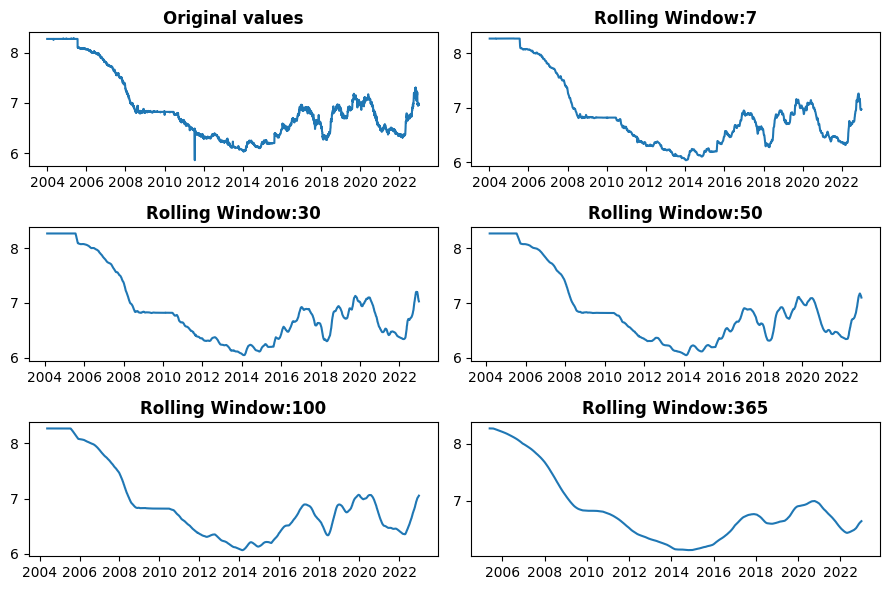

In [ ]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(Yuan_to_USD['Date'], Yuan_to_USD['China_Yuan'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(Yuan_to_USD['Date'],
             Yuan_to_USD['China_Yuan'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout()
plt.show()

Investingating the drop from 2004 and 2008:

In [23]:
Yuan_04_08 = Yuan_to_USD[(Yuan_to_USD["Date"].dt.year >= 2004) & (Yuan_to_USD["Date"].dt.year <= 2008)]
Yuan_04_08

,Date,China_Yuan,Year
0,2004-01-01,8.27,2004
1,2004-01-02,8.27,2004
2,2004-01-05,8.27,2004
3,2004-01-06,8.27,2004
4,2004-01-07,8.27,2004
...,...,...,...
1300,2008-12-25,6.84,2008
1301,2008-12-26,6.84,2008
1302,2008-12-29,6.84,2008
1303,2008-12-30,6.81,2008


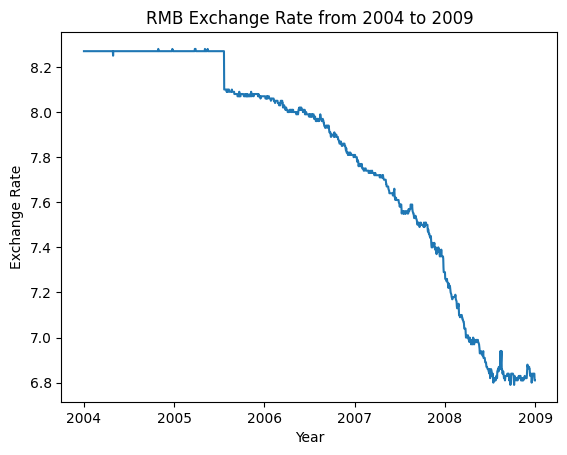

In [24]:
plt.plot(Yuan_04_08["Date"], Yuan_04_08["China_Yuan"])
plt.title("RMB Exchange Rate from 2004 to 2009")
plt.xlabel("Year")
plt.ylabel("Exchange Rate")
plt.show()

China depegs the rmb from USD on July 21, 2005. When nation pegs their currency onto another currency, the exchange rate is at a fixed rate. China pegged their currency back in 1997 make exports cheaper and international trade much more attractive. 

On July 21, 2005, China revalues the yuan by 2.1% and puts in some revisions to the rules that govern the currency. The currency appreciates 18.7% from 2005 to 2008, moving the exange rate from 8.11 to 6.83. 

China would peg the rmb against the USD once again in July of 2008 amid the 2008 financial crisis.

Sources: 
https://www.reuters.com/article/idUSSGE65I02S/
https://www.investopedia.com/articles/forex/030616/why-chinese-yuan-pegged.asp

Now, I am investigating how the exchange rate changed during the Covid-19 Pandemic as shown below.

In [40]:
Yuan_to_USD['Moving_AVG'] = Yuan_to_USD['China_Yuan'].rolling(7).mean()
Yuan_to_USD

,Date,China_Yuan,Year,Moving_AVG
0,2004-01-01,8.27,2004,NaN
1,2004-01-02,8.27,2004,NaN
2,2004-01-05,8.27,2004,NaN
3,2004-01-06,8.27,2004,NaN
4,2004-01-07,8.27,2004,NaN
...,...,...,...,...
4951,2022-12-26,6.99,2022,6.975714
4952,2022-12-27,6.96,2022,6.974286
4953,2022-12-28,6.96,2022,6.972857
4954,2022-12-29,6.98,2022,6.972857


In [72]:
prepandemic = Yuan_to_USD.copy()[(Yuan_to_USD['Year'] >= 2016) & (Yuan_to_USD['Year'] <= 2023)]
pandemic_time = Yuan_to_USD.copy()[(Yuan_to_USD['Year'] >= 2020) & (Yuan_to_USD['Year'] < 2022)]

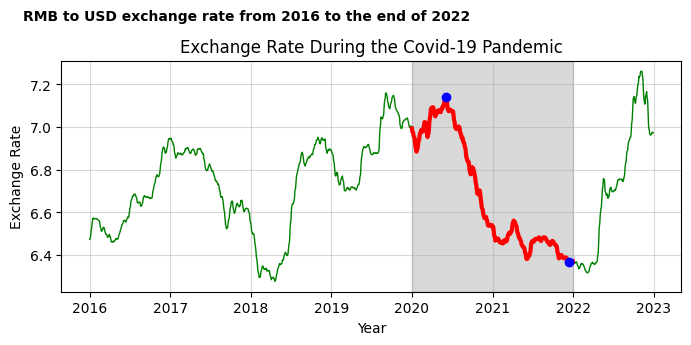

In [ ]:
### Adding the plot
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(prepandemic['Date'],
        prepandemic['Moving_AVG'],
        linewidth=1, color='green')

ax.plot(pandemic_time['Date'],
        pandemic_time['Moving_AVG'],
        linewidth=3, color='red')

ax.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2022-01-01'), color='grey', alpha=0.3)

ax.grid(alpha=0.5)

ax.text(16500.0, 7.5, 
        "RMB to USD exchange rate from 2016 to the end of 2022",
        weight='bold')

pand_min_idx = pandemic_time['Moving_AVG'].idxmin()
pand_max_idx = pandemic_time['Moving_AVG'].idxmax()

pand_min_date = pandemic_time['Date'][pand_min_idx]
pand_min = pandemic_time['Moving_AVG'][pand_min_idx]
pand_max_date = pandemic_time['Date'][pand_max_idx]
pand_max = pandemic_time['Moving_AVG'][pand_max_idx]

ax.scatter([pand_min_date], [pand_min], color='Blue', zorder=5, label='Pandemic Min')
ax.scatter([pand_max_date], [pand_max], color='Blue', zorder=5, label='Pandemic Max')

plt.title("Exchange Rate During the Covid-19 Pandemic")
plt.xlabel("Year")
plt.ylabel("Exchange Rate")
plt.show()


In [143]:
print(pandemic_time.loc[pandemic_time['Moving_AVG'].idxmax()])
print(pandemic_time.loc[pandemic_time['Moving_AVG'].idxmin()])

Date          2020-06-02 00:00:00
China_Yuan                   7.13
Year                         2020
Moving_AVG               7.141429
Name: 4282, dtype: object
Date          2021-12-15 00:00:00
China_Yuan                   6.37
Year                         2021
Moving_AVG               6.365714
Name: 4683, dtype: object


The line plot areas in red show the exchange rate of the RMB to USD during the Covid-19 pandemic. Based on a rolling mean with a window size of 7, the maximum exhange rate was on June 2nd, 2020, with an exchange rate of 7.13. The minimum was 6.37 on December 15, 2021. It makes sense for the exchange rate to decline as time goes on since the Chinese government mandated harsher lockdowns and there was less confidence in the market overall because of the pandemic. 